In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install torchvision

In [3]:
import torchvision

In [4]:
mnist = torchvision.datasets.MNIST(root="", train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [6]:
x = mnist.data.numpy()
y = mnist.targets.numpy()

In [7]:
data = []

digits = [2, 3, 4]

for digit in digits:
    mask = y == digit
    data.append(x[mask][:200])

data = np.concatenate(data, axis=0)

In [8]:
# shuffle data
np.random.seed(0)
np.random.shuffle(data)
data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 248,  48,
          0,   0,   0,   0,   3, 154, 144,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

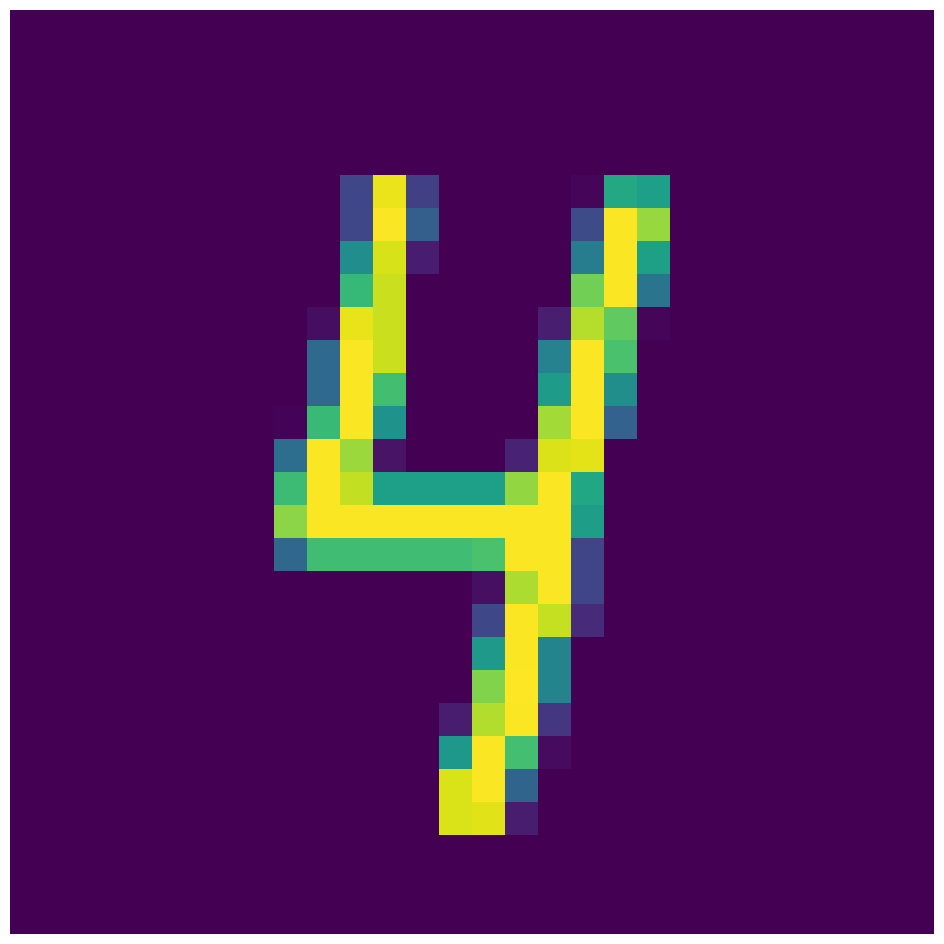

In [9]:
_, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(data[0])
ax.axis('off')
plt.show()

In [10]:
data = (data > 127.0).astype(np.float32)

In [11]:
data[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0

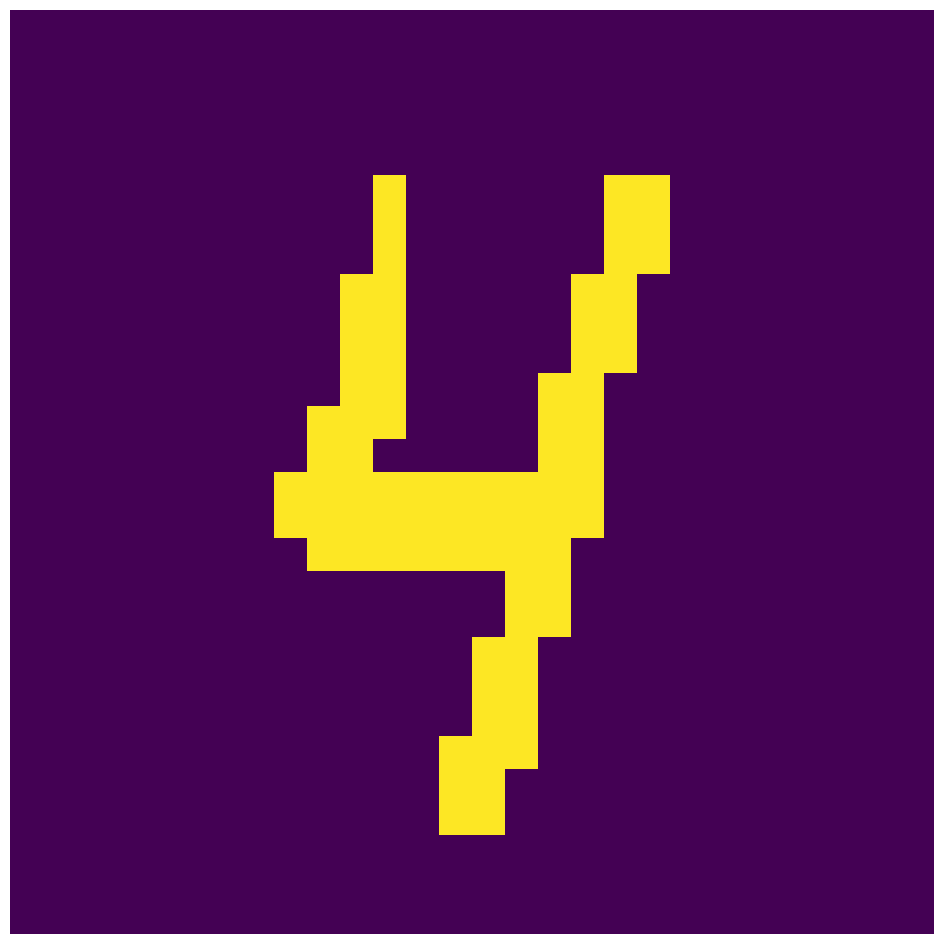

In [12]:
_, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(data[0])
ax.axis('off')
plt.show()

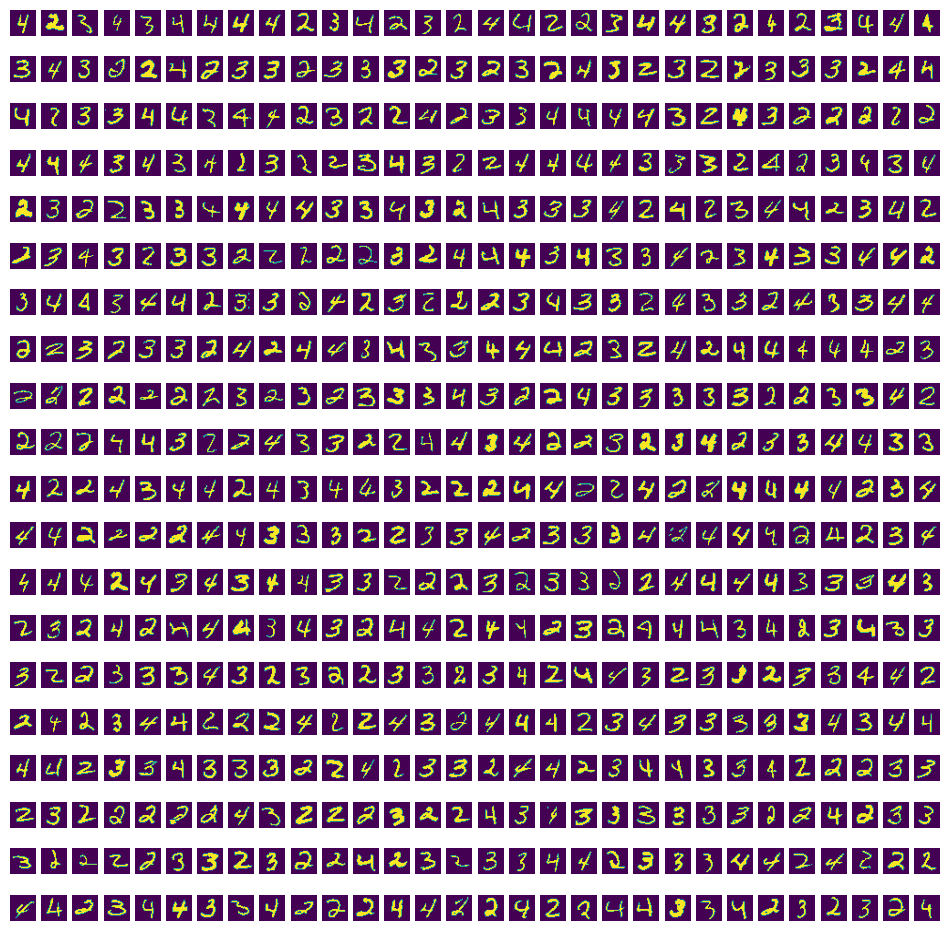

In [12]:
n_row = 20
n_col = 30

_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(data, axs):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
# 600 binarized images of numbers 2, 3, 4 are in variable `data`

...

Solution

In [13]:
# using bernoulli and softmax from scipy.stats

from scipy.stats import bernoulli
from scipy.special import softmax

In [14]:
# `bernoulli` is vectorized, i.e. this works:

p = [0.3, 0.5, 0.9]
x = bernoulli(p)
print(f"{x.pmf([0, 1, 1])=}")
print(f"{x.logpmf([0, 1, 1])=}")

x.pmf([0, 1, 1])=array([0.7, 0.5, 0.9])
x.logpmf([0, 1, 1])=array([-0.35667494, -0.69314718, -0.10536052])


In [15]:
# softmax works along axis and implements logsumexp-like trick

x = np.arange(12).reshape([3, 4])
print(f"{softmax(x, axis=-1)=}")

softmax(x, axis=-1)=array([[0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426]])


In [16]:
# flattening data

X = data.reshape(600, -1)
N, D = X.shape
print(f"{N=}, {D=}")

N=600, D=784


In [17]:
# unvectorized solution:

def e_step(X, pi, mu):
    N, D = X.shape
    K = pi.shape[0]
    assert mu.shape == (K, D)
    
    unnormalized_log_gamma_z = -1 * np.ones([N, K])

    for n in range(N):
        for k in range(K):
            unnormalized_log_gamma_z[n, k] = np.log(pi[k]) + np.sum(bernoulli(mu[k]).logpmf(X[n]))
    gamma_z = softmax(unnormalized_log_gamma_z, axis=-1)
    
    return gamma_z

def m_step(X, gamma_z):
    N, D = X.shape
    N_gamma_z, K = gamma_z.shape
    assert N == N_gamma_z

    N_ = gamma_z.sum(axis=0)
    print(f"{N_=}")

    x_bar = -1 * np.ones([K, D])

    for k in range(K):
        x_bar[k] = (gamma_z[:, k].reshape(-1, 1) * X).sum(axis=0) / N_[k]

    mu = x_bar
    pi = N_ / N

    return pi, mu

In [18]:
# initializing parameters
K = 3
pi = np.ones(3) / K

# mu initialized as described in Bishop: not working without log-space, and suboptimal results ...
mu = np.random.uniform(low=0.25, high=0.75, size=(K, D))
mu = mu / mu.sum(axis=-1).reshape(3, -1)

# # alternative initializations of mu:
# # 1) normalization along different axis (was this meant by Bishop in the first place?)
mu = np.random.uniform(low=0.25, high=0.75, size=(K, D))
mu = mu / mu.sum(axis=0)
# # 2) data driven initialization
mu = -1 * np.ones([K, D])
mu[0] = np.mean(X[:200], axis=0)
mu[1] = np.mean(X[200:400], axis=0)
mu[2] = np.mean(X[400:], axis=0)

print(f"{pi=}")
print(f"{mu.shape=}")
print(f"{mu.sum(axis=-1)=}")
print(f"{mu=}")

# run 10 epochs of EM ...
for _ in range(10):
    gamma_z = e_step(X=X, pi=pi, mu=mu)
    pi, mu = m_step(X=X, gamma_z=gamma_z)

pi=array([0.33333333, 0.33333333, 0.33333333])
mu.shape=(3, 784)
mu.sum(axis=-1)=array([107.30999993, 108.99999983, 108.15500024])
mu=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
N_=array([196.34709246, 229.22482535, 174.4280822 ])
N_=array([208.9350294 , 233.72669191, 157.33827869])
N_=array([203.61728053, 228.75201859, 167.63070088])
N_=array([203.34800489, 217.91767411, 178.734321  ])
N_=array([203.79809069, 212.19212071, 184.0097886 ])
N_=array([207.1467869, 208.8728059, 183.9804072])
N_=array([212.17193572, 207.46337139, 180.36469288])
N_=array([218.05185279, 206.56118706, 175.38696014])
N_=array([220.86936709, 206.55190724, 172.57872567])
N_=array([223.95923791, 207.14552807, 168.89523402])


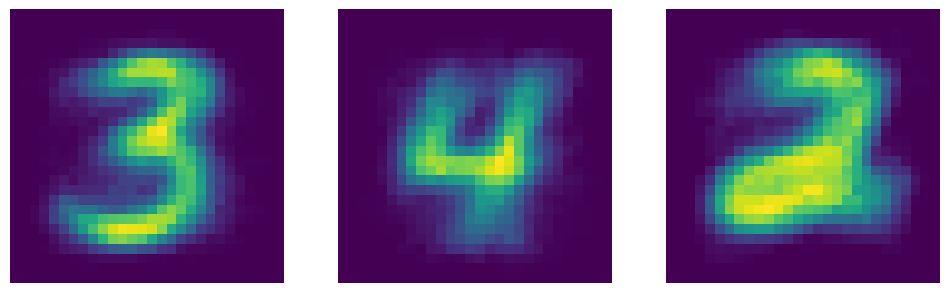

In [19]:
# visualize means

_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(mu, axs):
    ax.imshow(img.reshape(28, 28))
    ax.axis('off')
plt.show()

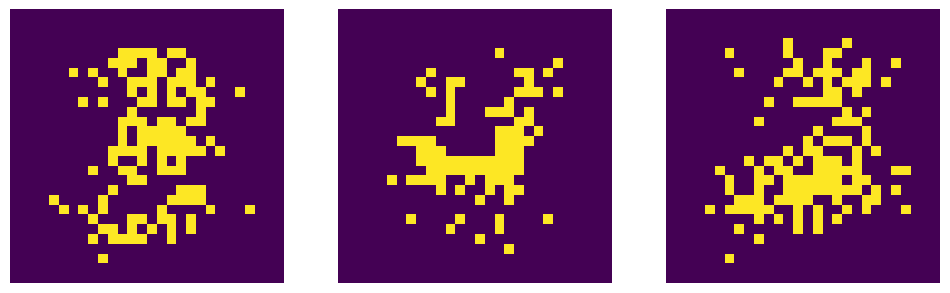

In [20]:
# visualize samples

_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(mu, axs):
    img = bernoulli(img).rvs()
    ax.imshow(img.reshape(28, 28))
    ax.axis('off')
plt.show()